# About the Model


The goal of this model is to accurately predict whether or not an adult makes more than 50k USD per annum which is around the average salary in the USA, on the basis of the features given. 


## Introduction 





Loading the data


In [1]:
import warnings 
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [2]:
df = pd.read_csv('adult.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


df.head()

 About the Dataset 

* **Age**: Describes the age of individuals. Continuous.
* **Workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* **fnlwgt**: Continuous.
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* **education-num**: Number of years spent in education. Continuous.
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* **race**: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* **sex**: Female, Male.
* **capital-gain**: Continuous.
* **capital-loss**: Continuous.
* **hours-per-week**: Continuous.
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
* **salary**: >50K,<=50K

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education.num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital.loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


## Cleaning the Dataset




### Replacing ? with null values

In [6]:
df[df == '?'] = np.nan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Filling null values with mode

In [7]:
for col in ['workclass', 'occupation', 'native.country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

## Exploratory Data Analysis

### Bar graph showing the distribution of income

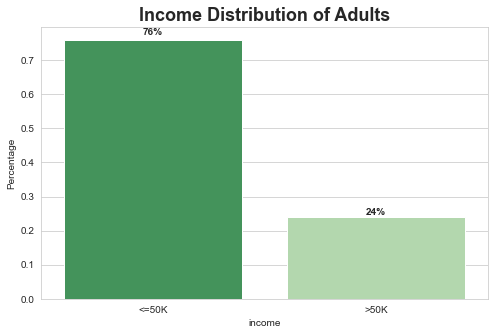

In [8]:
sns.set_style("whitegrid")
plt.figure(figsize = (8,5))
plt.title('Income Distribution of Adults', fontsize=18, fontweight='bold')
eda_percentage = df['income'].value_counts(normalize = True).rename_axis('income').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'income', y = 'Percentage', data = eda_percentage.head(10), palette='Greens_r')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

In [9]:
def age_group(x):
    x = int(x)
    x = abs(x)
    if( 18 < x < 31 ):
        return "19-30"
    if( 30 < x < 41 ):
        return "31-40"
    if( 40 < x < 51 ):
        return "41-50"
    if( 50 < x < 61 ):
        return "51-60"
    if( 60 < x < 71 ):
        return "61-70"
    else:
        return "Greater than 70"

df['age_group'] = df['age'].apply(age_group)

### Plot showing income for various age groups

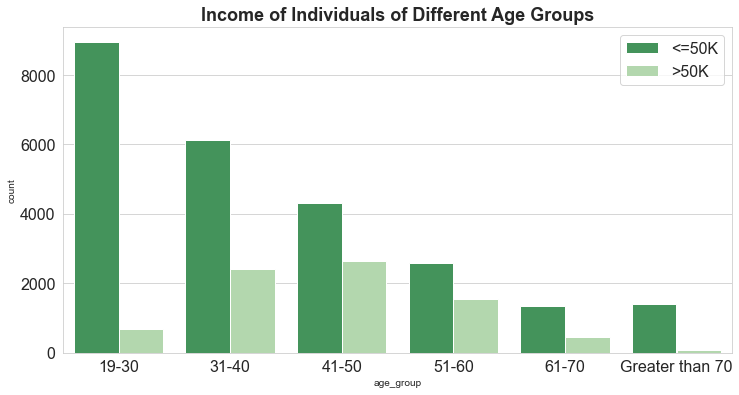

In [10]:
plt.figure(figsize=(12,6))
order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
sns.countplot(df['age_group'], hue = df['income'], palette='Greens_r', order = order_list)
plt.title('Income of Individuals of Different Age Groups', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

### Plot showing the income of individuals across working classes

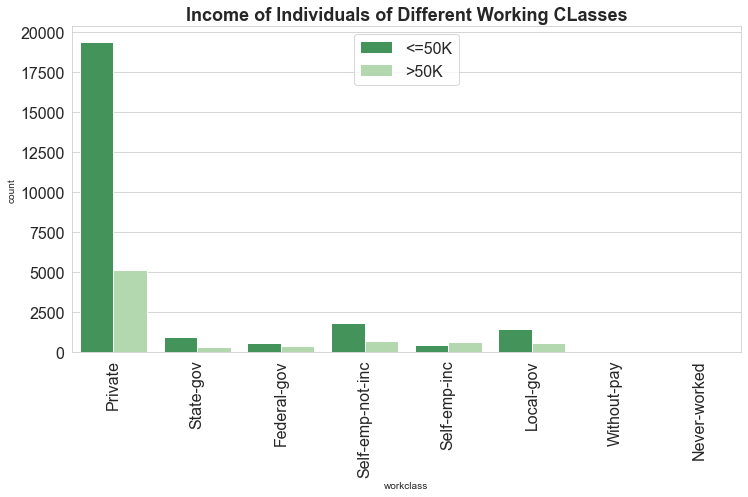

In [11]:
plt.figure(figsize=(12,6))
#order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
sns.countplot(df['workclass'], hue = df['income'], palette='Greens_r')
plt.title('Income of Individuals of Different Working CLasses', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

### Plot showing income for various levels of education

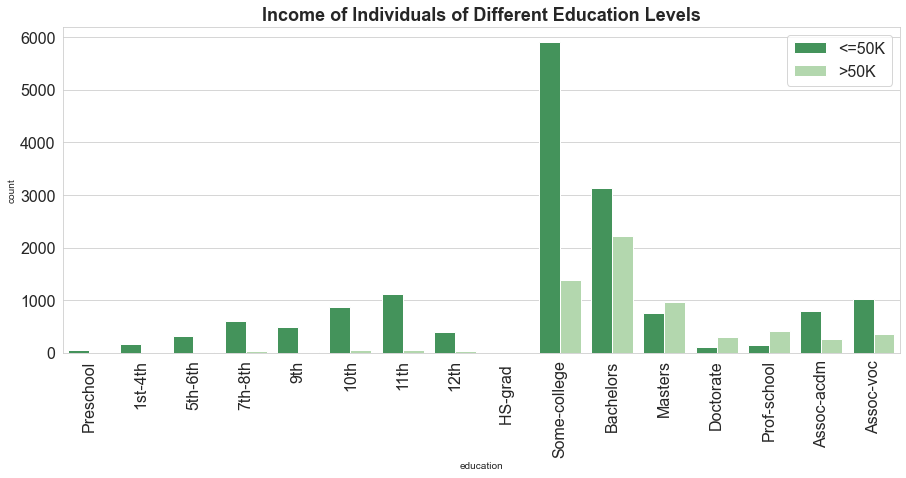

In [12]:
plt.figure(figsize=(15,6))
order_list = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 
                'HS-grad ', 'Some-college', 'Bachelors', 'Masters', 'Doctorate', 'Prof-school', 
              'Assoc-acdm', 'Assoc-voc']
sns.countplot(df['education'], hue = df['income'], palette='Greens_r', order= order_list)
plt.title('Income of Individuals of Different Education Levels', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

### Income according to marital status

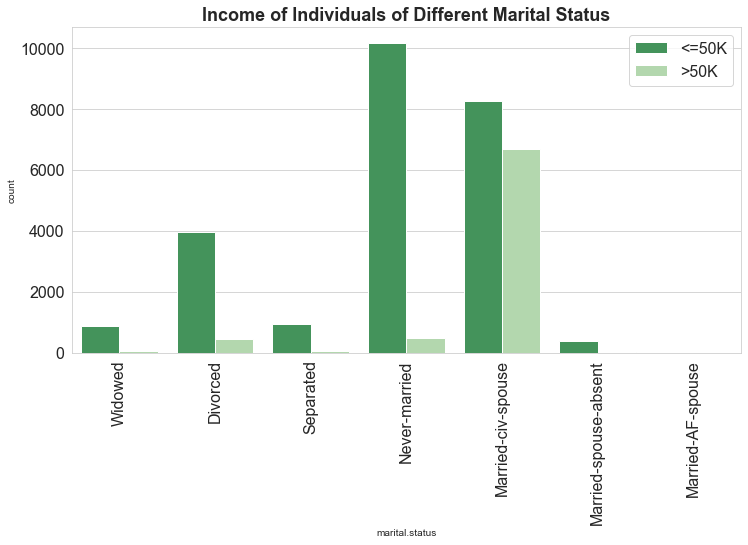

In [13]:
plt.figure(figsize=(12,6))
#order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
sns.countplot(df['marital.status'], hue = df['income'], palette='Greens_r')
plt.title('Income of Individuals of Different Marital Status', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

### Income according to occupations

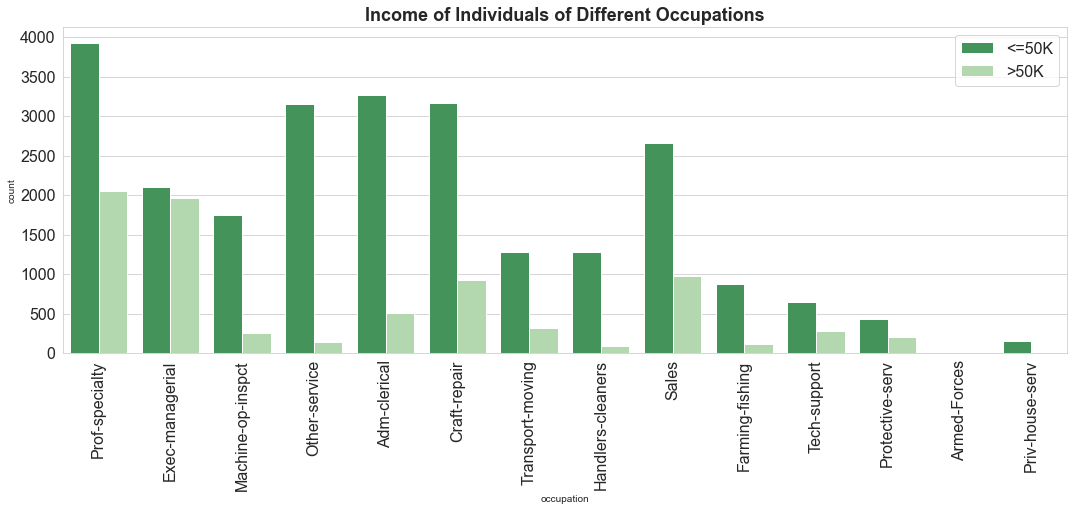

In [14]:
plt.figure(figsize=(18,6))
#order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
sns.countplot(df['occupation'], hue = df['income'], palette='Greens_r')
plt.title('Income of Individuals of Different Occupations', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

### Income according to relationship

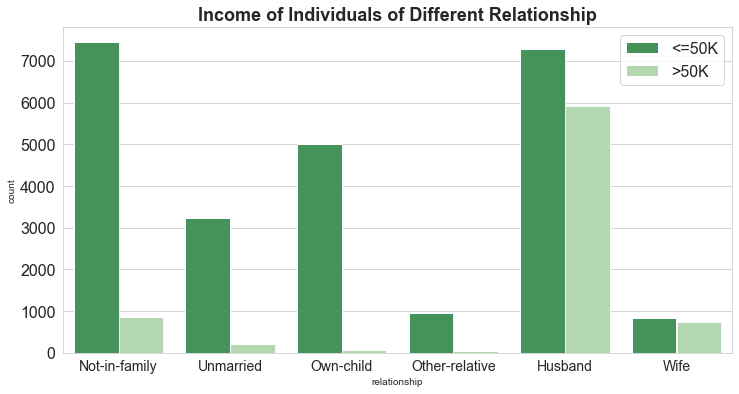

In [15]:
plt.figure(figsize=(12,6))
#order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
sns.countplot(df['relationship'], hue = df['income'], palette='Greens_r')
plt.title('Income of Individuals of Different Relationship', fontsize=18, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

### Income according to gender

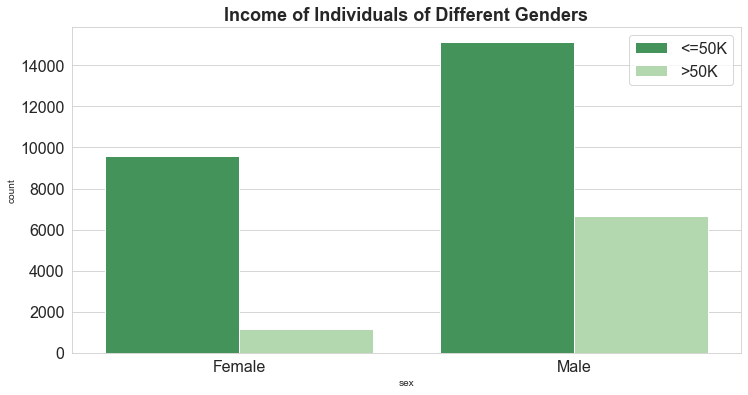

In [16]:
plt.figure(figsize=(12,6))
#order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
sns.countplot(df['sex'], hue = df['income'], palette='Greens_r')
plt.title('Income of Individuals of Different Genders', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

In [17]:
df['income']=df['income'].map({'<=50K': 0, '>50K': 1})


### Heatmat showing positive correlation with different features

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


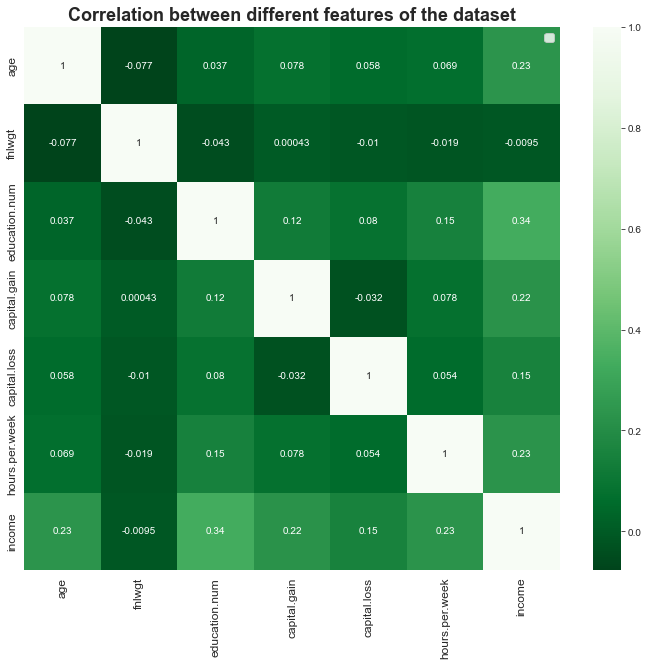

In [18]:
plt.figure(figsize = (12,10))
plt.title("Correlation between different features of the dataset", fontsize = 18, fontweight = 'bold')
sns.heatmap(df.corr(), cmap = 'Greens_r', annot = True)
plt.xticks(fontsize=12, rotation = 90)
plt.yticks(fontsize=12, rotation = 90)
plt.legend(fontsize=12)

In [19]:
#Combining the lower grades of education together
df['education'].replace(['11th', '9th', '7th-8th', '5th-6th', '10th', '1st-4th', 'Preschool', '12th'],
                             ' School', inplace = True)

df['race'].replace(['Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'],' Other', inplace = True)
# Dropping additional columns created for plotting
df.drop('age_group', inplace = True, axis = 1)
df.drop(['education.num'], axis = 1, inplace = True)


In [20]:
df.head()

,age,workclass,fnlwgt,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,Private,186061,Some-college,Widowed,Prof-specialty,Unmarried,Other,Female,0,4356,40,United-States,0
3,54,Private,140359,School,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0


## Model Implementation 

* Labeling 
* Dividing the model into test and train sets

In [21]:
from sklearn.preprocessing import LabelEncoder
categorical = ['workclass','education', 'marital.status', 'occupation', 'relationship',
               'race', 'sex','native.country']
label_encoders = {}
for col in categorical:
    le = LabelEncoder()
    le.fit(df[col])
    df[col] = le.transform(df[col])
    label_encoders[col] = le
    
from sklearn.model_selection import train_test_split
x = df[['workclass','education', 'marital.status', 'occupation', 'relationship',
               'race', 'sex','native.country', 'age', 'fnlwgt', 'capital.gain', 'capital.loss', 'hours.per.week']]
y = df['income']
    
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)


## Dividing the model into training and testing

In [22]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
x = df[['workclass','education', 'marital.status', 'occupation', 'relationship',
               'race', 'sex','native.country', 'age', 'fnlwgt', 'capital.gain', 'capital.loss', 'hours.per.week']]
y = df['income']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
    
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = pd.DataFrame(scaler.fit_transform(x_train), columns = x.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns = x.columns)

In [23]:
from sklearn.metrics import accuracy_score
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

Y_pred = logreg.predict(x_test)

acc = accuracy_score(y_test, Y_pred)
print("Logistic Regression",acc)



X = df[['workclass','education', 'marital.status', 'occupation', 'relationship',
               'race', 'sex','native.country', 'age', 'fnlwgt', 'capital.gain', 'capital.loss', 'hours.per.week']]
y = df['income']

 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

lr = LogisticRegression(solver='lbfgs', max_iter=10000)
rs = []
acc = []
for i in range(1,25,1):
    X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = i)
    X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)
    model_lr_rs = lr.fit(X_train, y_train)
    predict_values_lr_rs = model_lr_rs.predict(X_test)
    acc.append(accuracy_score(y_test, predict_values_lr_rs))
    rs.append(i)

Logistic Regression 0.8013102671716654


1 0.8028558268079227
2 0.8037770612620913
3 0.8077690772301551
4 0.7951788730231844
5 0.8096115461384923
6 0.7996315062183326
7 0.8027022877322278
8 0.8028558268079227
9 0.8033164440350069
10 0.8037770612620913
11 0.8023952095808383
12 0.8089973898357132
13 0.7996315062183326
14 0.799324428066943
15 0.8002456625211116
16 0.8028558268079227
17 0.8046982957162598
18 0.8082296944572394
19 0.7951788730231844
20 0.8057730692461231
21 0.8085367726086289
22 0.7942576385690158
23 0.7996315062183326
24 0.8005527406725012


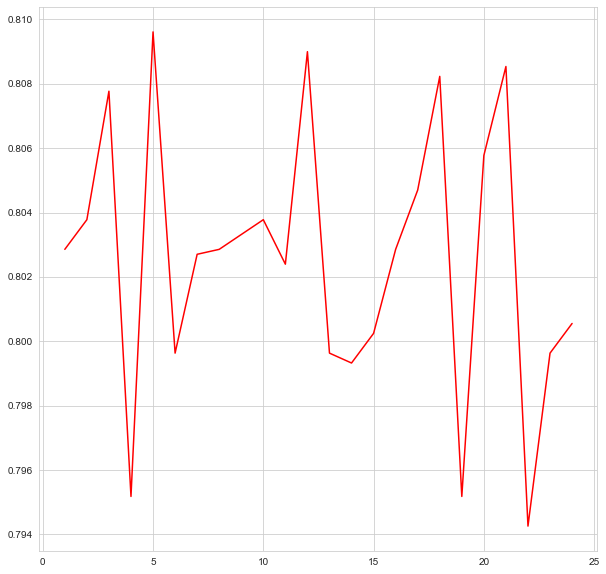

In [24]:
plt.figure(figsize=(10,10))
plt.plot(rs, acc, color ='red')

for i in range(len(rs)):
    print(rs[i],acc[i])

In [25]:
for i in range(0,24):
    if acc[i] > 0.808:
        print(acc[i])

0.8096115461384923
0.8089973898357132
0.8082296944572394
0.8085367726086289


## Working of the model with one example record

In [26]:
def predict_incomes(records, model, scaler, label_encoders):
    df_temp = pd.DataFrame(records)
    df_temp = df_temp[x.columns]
    
    for col in categorical:
        df_temp[col] = label_encoders[col].transform(df_temp[col])
        
    df_temp = pd.DataFrame(scaler.transform(df_temp), columns=x.columns)
    
    predictions = model.predict(df_temp)
    return predictions

# Example records with adjusted values
example_records = [
    {
        'workclass': 'Private',
        'education': 'Bachelors',
        'marital.status': 'Never-married',
        'occupation': 'Tech-support',
        'relationship': 'Not-in-family',
        'race': 'White',
        'sex': 'Male',
        'native.country': 'United-States',
        'age': 25,
        'fnlwgt': 226802,
        'capital.gain': 0,
        'capital.loss': 0,
        'hours.per.week': 40
    },
    {
        'workclass': 'State-gov',
        'education': 'Masters',
        'marital.status': 'Married-civ-spouse',
        'occupation': 'Exec-managerial',
        'relationship': 'Husband',
        'race': ' Other',  # Adjusted value
        'sex': 'Male',
        'native.country': 'United-States',
        'age': 45,
        'fnlwgt': 123011,
        'capital.gain': 0,
        'capital.loss': 0,
        'hours.per.week': 50
    },
    {
        'workclass': 'Private',
        'education': 'HS-grad',
        'marital.status': 'Divorced',
        'occupation': 'Handlers-cleaners',
        'relationship': 'Not-in-family',
        'race': ' Other',  # Adjusted value
        'sex': 'Female',
        'native.country': 'India',
        'age': 34,
        'fnlwgt': 154374,
        'capital.gain': 0,
        'capital.loss': 0,
        'hours.per.week': 35
    }
]

# Predicting incomes for the example records
predicted_incomes = predict_incomes(example_records, logreg, scaler, label_encoders)

# Printing predicted incomes
for record, income in zip(example_records, predicted_incomes):
    print("Predicted Income:", ">50K" if income == 1 else "<=50K")

Predicted Income: <=50K
Predicted Income: <=50K
Predicted Income: <=50K
